### 풀이
- 주워진 점으로 만들어진 직사각형에서 수직선을 뽑아 L에 넣는다. 이때 이 수직선이 왼쪽편 수직선(시작수직선)인지, 오른쪽 수직선(끝수직선)인지도 기록한다.
  - `x, y1, y2, 끝수직선 여부`
- L을 x를 기준으로 정렬한다.
- 높이 세그 `st`를 만든다. 일종의 높이에 대한 Difference array라고 생각하면 될 것 같다.
  - 애초에 True, False로만 기록해도 되지 않을까 라고 생각했지만, 직사각형 내에 여러개의 직사각형이 겹쳐있는 경우 문제가 생긴다.
  - 어떤 직사각형이 직사각형의 내부에서 끝날 때 True -> False가 될 것이고, 이건 실제로 그 공간이 비게 된게 아닌 것을 비었다고 처리하게 되는 것과 같게 된다. 
    - 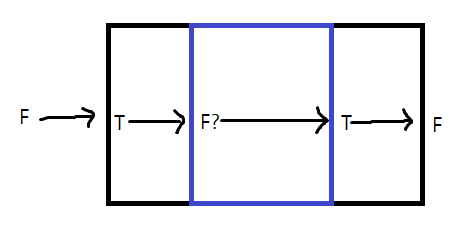
  - 따라서 겹친 횟수만큼 전부 기록해야 한다. 
  - 겹쳐있는 높이에 대해서는 1번만 계산해야 하므로, Difference array의 값이 1 이상인지만 확인하는 누적합 세그(`st2`)를 만든다.
    - 동작은 단순하다. `st[i]`를 업데이트 한 후, `st[i]`의 값이 1 이상인지 True/False만 기록한다.
    - `True + True = 2`
    - 굳이 세그트리를 쓰지 않아도 될 것 같긴 하다.
- 왼쪽에서 오른쪽으로 스위핑하면서 수직선마다 다음의 과정을 처리한다.
    1. 직전 수직선과 x좌표에 차이가 있다면 그 차이만큼(`dx`) `st2`에서 값이 True인 구간을 구한다. 그것이 답에 반영되어야 하는 높이의 합이며, 이걸 `dx`와 곱해 정답에 더한다.
    2. 현재 수직선이 시작 수직선이라면 해당 수직선에 대한 `st`의 값을 1 증가시킨다. 끝 수직선이라면 1 감소시킨다.
- 직관성을 위해 답이 더해지는 과정을 그림으로 나타내면 다음과 같다.
    1. 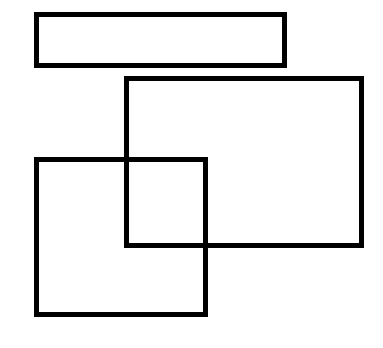
    2. 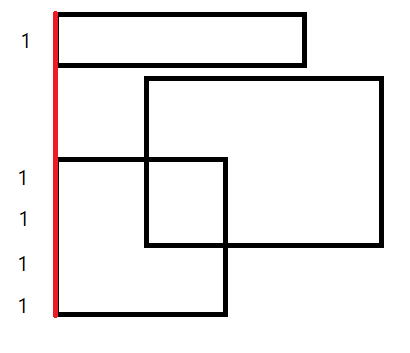
    3. 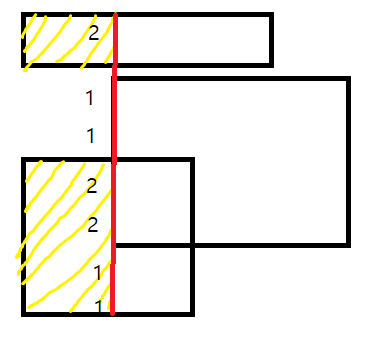
    4. 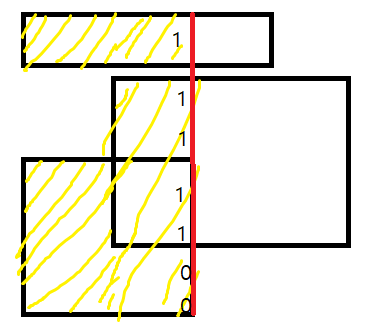
    5. 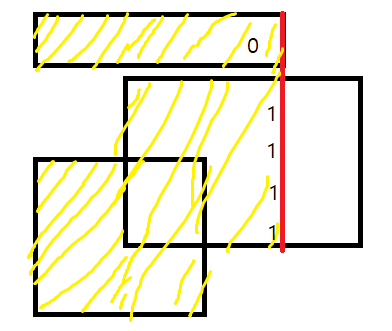
    6. 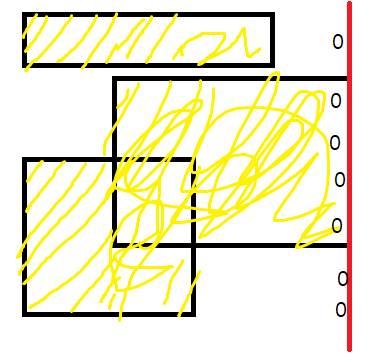
    - 넓이의 계산이 끝난 후에 `st`가 업데이트되는 것을 기록한 것이다.

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class ST:
  def __init__(self, L, default, f):
    self._def = default
    self._f = f
    self._len = len(L)
    self._size = _size = 1 << (self._len - 1).bit_length()

    self.L = [default] * (2 * _size)
    self.L[_size:_size + self._len] = L
    for i in reversed(range(_size)):
      self.L[i] = f(self.L[i + i], self.L[i + i + 1])

  def __delitem__(self, i):
    self[i] = self._def

  def __getitem__(self, i):
    return self.L[i + self._size]

  def __setitem__(self, i, v):
    i += self._size
    self.L[i] = v
    i >>= 1
    while i:
      self.L[i] = self._f(self.L[2 * i], self.L[2 * i + 1])
      i >>= 1

  def __len__(self):
    return self._len
  
  def query(self, s, e):
    s += self._size
    e += self._size

    l = r = self._def
    while s < e: 
      if s & 1:
        l = self._f(l, self.L[s])
        s += 1
      if e & 1:
        e -= 1
        r = self._f(self.L[e], r)
      s >>= 1
      e >>= 1

    return self._f(l, r)

def sol():
  N = int(input())
  MAX = 30_000 + 1
  L = []
  for _ in range(N):
    x1, y1, x2, y2 = map(int, input().split())
    L.append((x1, y1, y2, False))
    L.append((x2, y1, y2, True))
    
  L.sort()
  answer = 0
  st = ST([0] * MAX, 0, lambda x, y: x + y) #cnt
  st2 = ST([False] * MAX, False, lambda x, y: x + y) #st의 값이 1 이상인지 여부(True + True = 2)
  last_x = L[0][0]
  for x, y1, y2, is_end in L:
    if x != last_x:
      dx = x - last_x
      answer += st2.query(0, MAX) * dx
      last_x = x

    for y in range(y1, y2) :
      st[y] += -1 if is_end else 1 #시작 수직선이면 +1, 끝이면 -1
      st2[y] = st[y] > 0
      assert(st[y] >= 0), st[y]
  
  sys.stdout.write(str(answer) + '\n')

sol()

- `st2`를 없앤 구현. 변화량이 감지되면 그 값을 `dy`라는 변수에 반영시켜서 st의 값이 1 이상인지 확인하는 연산을 $O(N \log N)$ 에서 $O(N)$으로 줄였다.

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class ST:
  def __init__(self, L, default, f):
    self._def = default
    self._f = f
    self._len = len(L)
    self._size = _size = 1 << (self._len - 1).bit_length()

    self.L = [default] * (2 * _size)
    self.L[_size:_size + self._len] = L
    for i in reversed(range(_size)):
      self.L[i] = f(self.L[i + i], self.L[i + i + 1])

  def __delitem__(self, i):
    self[i] = self._def

  def __getitem__(self, i):
    return self.L[i + self._size]

  def __setitem__(self, i, v):
    i += self._size
    self.L[i] = v
    i >>= 1
    while i:
      self.L[i] = self._f(self.L[2 * i], self.L[2 * i + 1])
      i >>= 1

  def __len__(self):
    return self._len
  
  def query(self, s, e):
    s += self._size
    e += self._size

    l = r = self._def
    while s < e: 
      if s & 1:
        l = self._f(l, self.L[s])
        s += 1
      if e & 1:
        e -= 1
        r = self._f(self.L[e], r)
      s >>= 1
      e >>= 1

    return self._f(l, r)

def sol():
  N = int(input())
  MAX = 30_000 + 1
  L = []
  for _ in range(N):
    x1, y1, x2, y2 = map(int, input().split())
    L.append((x1, y1, y2, False))
    L.append((x2, y1, y2, True))
    
  L.sort()
  answer = 0
  st = ST([0] * MAX, 0, lambda x, y: x + y) #cnt
  st2 = [False] * MAX
  dy = 0
  last_x = L[0][0]
  for x, y1, y2, is_end in L:
    if x != last_x:
      dx = x - last_x
      answer += dy * dx
      last_x = x

    for y in range(y1, y2) :
      st[y] += -1 if is_end else 1 #시작 수직선이면 +1, 끝이면 -1
      if st2[y] != (st[y] > 0):
        dy -= st2[y] - (st[y] > 0)
        st2[y] = st[y] > 0
  
  sys.stdout.write(str(answer) + '\n')

sol()

- 124ms -> 120ms
- 117156KB -> 115344KB

- 정말 충격적인게, 이 풀이에선 세그먼트 트리가 아예 필요가 없다.

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def sol():
  N = int(input())
  MAX = 30_000 + 1
  L = []
  for _ in range(N):
    x1, y1, x2, y2 = map(int, input().split())
    L.append((x1, y1, y2, False))
    L.append((x2, y1, y2, True))
    
  L.sort()
  answer = 0
  st = [0] * MAX
  st2 = [False] * MAX
  dy = 0
  last_x = L[0][0]
  for x, y1, y2, is_end in L:
    if x != last_x:
      dx = x - last_x
      answer += dy * dx
      last_x = x

    for y in range(y1, y2) :
      st[y] += -1 if is_end else 1 #시작 수직선이면 +1, 끝이면 -1
      if st2[y] != (st[y] > 0):
        dy -= st2[y] - (st[y] > 0)
        st2[y] = st[y] > 0
  
  sys.stdout.write(str(answer) + '\n')

sol()